# Get_Cluster_from_grocery_dataset

In [2]:
import pandas as pd
import numpy as np
import json
import cv2
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline
# from nltk.util import flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [86]:
df = pd.DataFrame(columns= ["image_id", "xmin", "ymin", "xmax","ymax" ,"class"])


def convert_coord_to_csv(name, coord_list):
    d = {
        "image_id": [name], 
         "xmin": [coord_list[0]], 
         "ymin": [coord_list[1]], 
         "xmax": [coord_list[2]],
         "ymax": [coord_list[3]],
         "class":[coord_list[4]]
        }
    df1 = pd.DataFrame(data=d)
    df1.to_csv("grosary_annotation.csv", mode='a+',  index=False, header=False)
    

def get_chunks(the_list, chunk_size):
    while the_list:
        chunked_list = the_list[0:chunk_size]
        yield chunked_list
        
        the_list = the_list[chunk_size:]

        
def convert_chunk(name, file_cord_list):
    for i in get_chunks(file_cord_list, 5):
        convert_coord_to_csv(name, i)


In [2]:
with open("grocerydataset/annotation.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        file_cord_list = line.split()
        NAME = file_cord_list[0]
        NUM_OF_CORD = file_cord_list[1]
        file_cord_list = file_cord_list[2:]
        convert_chunk(NAME, file_cord_list)


In [3]:
df = pd.read_csv('grosary_annotation.csv')

In [4]:
df.head()

,C1_P01_N1_S2_1.JPG,1008,1552,252,376,0
0,C1_P01_N1_S2_1.JPG,1028,928,252,376,0
1,C1_P01_N1_S2_1.JPG,24,872,244,392,0
2,C1_P01_N1_S2_1.JPG,280,1568,252,376,0
3,C1_P01_N1_S2_1.JPG,292,872,252,376,0
4,C1_P01_N1_S2_1.JPG,40,1560,252,376,0


In [5]:
df.columns = ['image_id', 'xmin', 'ymin', 'width', 'height', 'class']

In [6]:
df.head()

,image_id,xmin,ymin,width,height,class
0,C1_P01_N1_S2_1.JPG,1028,928,252,376,0
1,C1_P01_N1_S2_1.JPG,24,872,244,392,0
2,C1_P01_N1_S2_1.JPG,280,1568,252,376,0
3,C1_P01_N1_S2_1.JPG,292,872,252,376,0
4,C1_P01_N1_S2_1.JPG,40,1560,252,376,0


In [7]:
df['xmax'] = df['xmin'].map(int) + df['width'].map(int) 
df['ymax'] = df['ymin'].map(int) + df['height'].map(int)
# # df['xmax_xmin'] =  df['xmax'] - df['xmin']
# # df['ymax_ymin'] = df['ymax'] - df['ymin']
df.head()
data = np.array(df[['width', 'height']])

In [8]:
kk = df[df['image_id']=='C1_P03_N2_S3_2.JPG']
kk

,image_id,xmin,ymin,width,height,class,xmax,ymax
782,C1_P03_N2_S3_2.JPG,1096,1044,196,268,0,1292,1312
783,C1_P03_N2_S3_2.JPG,1284,1056,196,268,0,1480,1324
784,C1_P03_N2_S3_2.JPG,140,1004,196,296,0,336,1300
785,C1_P03_N2_S3_2.JPG,1480,1056,196,268,0,1676,1324
786,C1_P03_N2_S3_2.JPG,1572,1696,184,324,0,1756,2020
787,C1_P03_N2_S3_2.JPG,1664,1064,196,268,0,1860,1332
788,C1_P03_N2_S3_2.JPG,1808,324,224,268,0,2032,592
789,C1_P03_N2_S3_2.JPG,1868,1068,196,268,0,2064,1336
790,C1_P03_N2_S3_2.JPG,1992,320,224,268,0,2216,588
791,C1_P03_N2_S3_2.JPG,2140,1764,184,292,0,2324,2056


/home/kk/Downloads/infilect/GroceryDataset_part1/ShelfImages/train/C1_P03_N2_S3_2.JPG


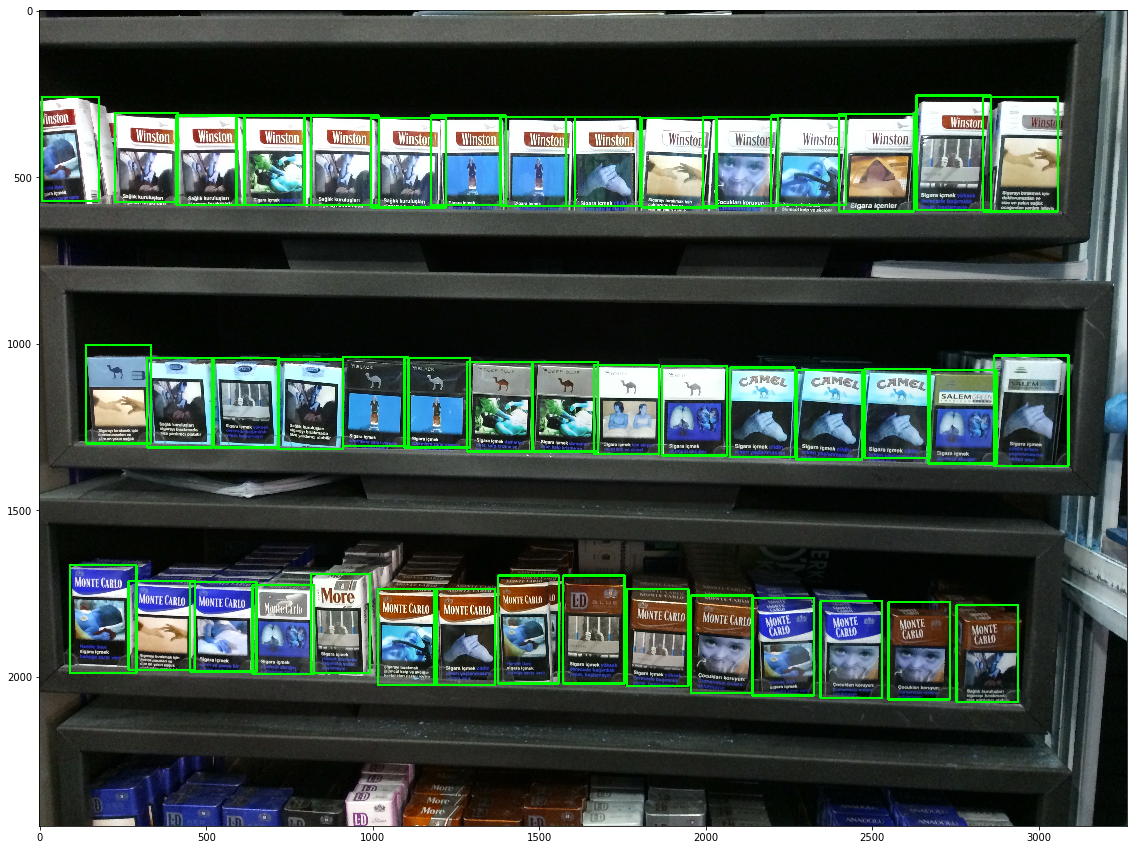

In [10]:
xmin = kk['xmin']   
ymin = kk['ymin']
xmax = kk['xmax']
ymax = kk['ymax']

name = kk["image_id"].values[0]
path = '/home/kk/Downloads/infilect/GroceryDataset_part1/ShelfImages/train/'+name
print(path)
def drow_rectangle_box(img_name, xmin, ymin, xmax, ymax):
#     if img_name.endswith(".jpg"):
#     image_name = img_name.split("/")[-1]
#     print(f'{path}'+"/all_images/"+img_name)
    image = cv2.imread(img_name)
#     print(image)
    for b,c,d,e in zip(xmin, ymin, xmax, ymax):
        image = cv2.rectangle(image,(b,c),(d,e),[0,255,2],5)
    plt.figure(figsize=(30,15))
    plt.imshow(image)
    
drow_rectangle_box(path, xmin, ymin, xmax, ymax)

In [25]:
def iou(box, clusters):
    """
    Calculates the Intersection over Union (IoU) between a box and k clusters.
    :param box: tuple or array, shifted to the origin (i. e. width and height)
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: numpy array of shape (k, 0) where k is the number of clusters
    """
    x = np.minimum(clusters[:, 0], box[0])
    y = np.minimum(clusters[:, 1], box[1])
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection)

    return iou_


def avg_iou(boxes, clusters):
    """
    Calculates the average Intersection over Union (IoU) between a numpy array of boxes and k clusters.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param clusters: numpy array of shape (k, 2) where k is the number of clusters
    :return: average IoU as a single float
    """
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])


def translate_boxes(boxes):
    """
    Translates all the boxes to the origin.
    :param boxes: numpy array of shape (r, 4)
    :return: numpy array of shape (r, 2)
    """
    new_boxes = boxes.copy()
    for row in range(new_boxes.shape[0]):
        new_boxes[row][2] = np.abs(new_boxes[row][2] - new_boxes[row][0])
        new_boxes[row][3] = np.abs(new_boxes[row][3] - new_boxes[row][1])
    return np.delete(new_boxes, [0, 1], axis=1)

In [26]:
def kmeans(boxes, k, dist=np.median):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param k: number of clusters
    :param dist: distance function
    :return: numpy array of shape (k, 2)
    """
    rows = boxes.shape[0]

    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))

    np.random.seed()

    # the Forgy method will fail if the whole array contains the same rows
    clusters = boxes[np.random.choice(rows, k, replace=False)]

    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break

        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters

In [27]:
from sklearn.cluster import KMeans

k = 3
out = kmeans(data, k=k)
print("Accuracy: {:.2f}%".format(avg_iou(data, out) * 100))
print("Boxes:\n {}".format(out))

ratios = np.around(out[:, 0] / out[:, 1], decimals=2).tolist()
print("Ratios:\n {}".format(sorted(ratios)))

Accuracy: 81.59%
Boxes:
 [[232 364]
 [180 268]
 [116 168]]
Ratios:
 [0.64, 0.67, 0.69]


# use ratio=0.67 to good fit fro bbox, accuracy>75%

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
colmap = {1: 'red', 2: 'green', 3: 'blue', 4:'cyan', 5:'yellow', 6:'magenta'}

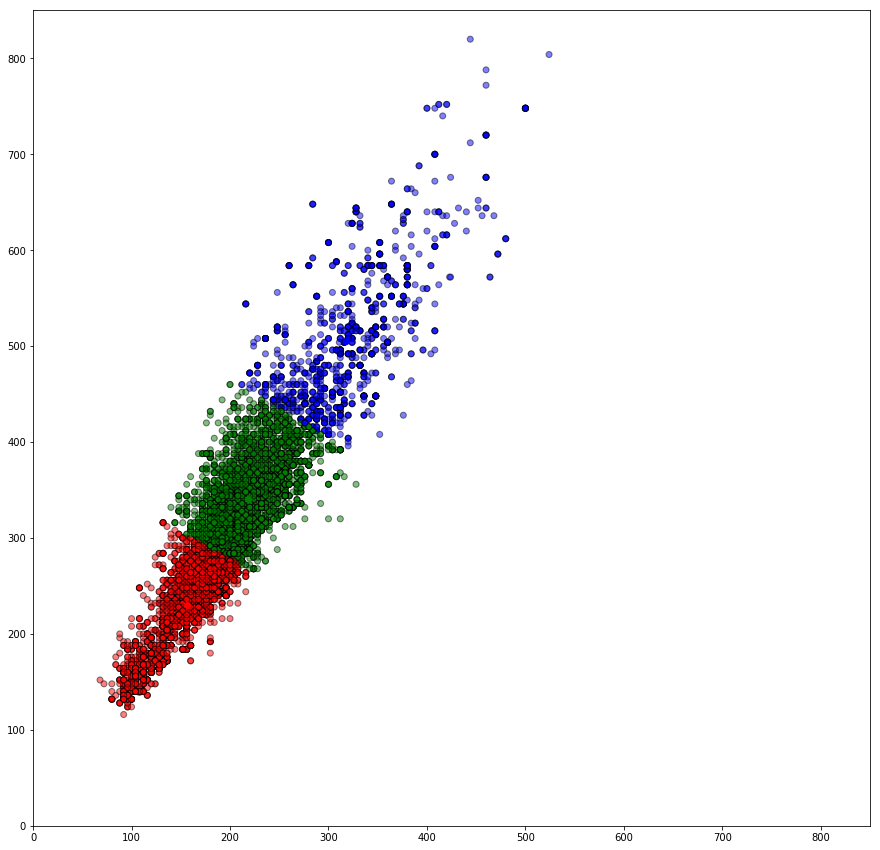

In [30]:
fig = plt.figure(figsize=(15, 15))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(df["width"],df['height'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 850)
plt.ylim(0, 850)
# plt.show()
plt.savefig('k-mean.png')

# Taking train data separate

In [2]:
def get_tables_from_csv(img_name, df):
    return df[df['image_id']==img_name]

def split_test_img_from_dataset(img_name_list, df):
    sample_df = pd.DataFrame(columns=df.columns)
    for i in img_name_list:
        kk = get_tables_from_csv(i, df)
        sample_df = pd.concat([sample_df, kk])
    sample_df.to_csv("train_data.csv", index=False)
#     return sample_df


In [47]:
test_list = os.listdir("./GroceryDataset_part1/ShelfImages/train/")
split_test_img_from_dataset(test_list, df)

In [45]:
df.to_csv("all_data.csv", index=False)

In [3]:
data = pd.read_csv('/home/kk/Downloads/infilect/my_data/annotations/annotations.csv')

In [7]:
class_name = data['classes'].values[0]
# class_name.encode('utf8')

# correcting labels

In [102]:
def get_crop_img(img, points):
    xmin, ymin, xmax, ymax = points
    img = np.copy(img)
    img = img[ymin:ymax, xmin:xmax]
    cv2.imwrite('kk.jpg', img)
    return 'kk.jpg'


def get_crop_imgarray(img, points):
    xmin, ymin, xmax, ymax = points
    img = np.copy(img)
    img = img[ymin:ymax, xmin:xmax]
#     cv2.imwrite('kk.jpg', img)
    return img

    
def get_tables_from_csv(img_name, df):
    return df[df['image_id']==img_name]
    
    
def write_img(img_array, img_name, dest_path):
    full_path = os.path.join(dest_path,img_name)
    if os.path.isfile(full_path):
        cv2.imwrite(full_path, img_array)
    else:
        cv2.imwrite(change_img_name_multiple_table(full_path), img_array)

# xception classification

In [4]:
from tensorflow.keras.models import load_model
model = load_model('final_gross_classification.h5')

In [127]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.xception import preprocess_input

In [128]:
label_dict = {0: '1', 1: '10', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

In [129]:
def predict_img_from_pretrain_model(img_path):
#     test_image = cv2.resize(image_array, (331, 331))
    test_image = image.load_img(img_path, target_size=(331, 331))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = preprocess_input(test_image)
    result = model.predict(test_image)[0]
    print(np.argmax(result))
    label = label_dict[np.argmax(result)]
    print("***",label)

def process_single_row(df):
    image_id = df['image_id']
    points = (df['xmin'], df['ymin'], df['xmax'], df['ymax'])
    img_array = cv2.imread(image_id)
    print(image_id)
    croped_img = get_crop_img(img_array, points)
    labels = predict_img_from_pretrain_model(croped_img)
    resize_img = cv2.resize(get_crop_imgarray(img_array, points), (331, 331))
    plt.imshow(resize_img)

In [130]:
# pred = []
# actual = []

# path = '/home/eleven/krunal/kk/cloth_type/cloth_type/test/'
# for attr in os.listdir(path):
#     for i, file in enumerate(os.listdir(f'{path}{attr}/')):
#         test_image = image.load_img(f'{path}{attr}/'+file, target_size=(331, 331))
#         test_image = image.img_to_array(test_image)
#         test_image = np.expand_dims(test_image, axis=0)
#         test_image = preprocess_input(test_image)
#         result = model.predict(test_image)[0]
#         label = label_dict[np.argmax(result)]
#         pred.append(label)
#         actual.append(attr)

In [131]:
data = pd.read_csv('train_data_retina.csv')

In [132]:
data.columns = ['image_id', 'xmin', 'ymin', 'xmax', 'ymax', 'class']

In [255]:
index = 687
kk= data[index:index+1]

/home/eleven/krunal/kk/experiment/table_detection/infilect/GroceryDataset_part1/ShelfImages/train/C3_P07_N1_S4_1.JPG
2
*** 2


687    None
dtype: object

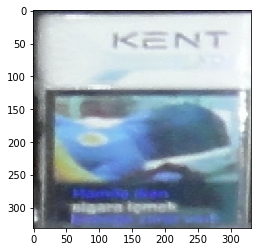

In [256]:
kk.apply(lambda x : process_single_row(x), axis=1)

In [258]:
data['correct_labels'] = data.apply(lambda x : process_single_row(x), axis=1)
data.to_csv("annotation.csv", index=False)

In [4]:
img_path = '/home/kk/Downloads/infilect/GroceryDataset_part1/ShelfImages/train/C1_P04_N2_S4_1.JPG'
image = cv2.imread(img_path)

True